# Task 1.2: Feature Extraction \& Engineering

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

## Loading the new dataset

In [2]:
df = pd.read_csv('../dataset/new_customer_supermarket.csv', sep='\t', index_col=0)
df

,BasketID,BasketDate,Sale,CustomerID,ProdID,ProdDescr,Qta
0,539993,2011-04-01 10:00:00,1.95,13313.0,22386,JUMBO BAG PINK POLKADOT,10
1,539993,2011-04-01 10:00:00,0.42,13313.0,21499,BLUE POLKADOT WRAP,25
2,539993,2011-04-01 10:00:00,0.42,13313.0,21498,RED RETROSPOT WRAP,25
3,539993,2011-04-01 10:00:00,2.10,13313.0,22379,RECYCLING BAG RETROSPOT,5
4,539993,2011-04-01 10:00:00,1.25,13313.0,20718,RED RETROSPOT SHOPPER BAG,10
...,...,...,...,...,...,...,...
323855,581585,2011-09-12 12:31:00,1.95,15804.0,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12
323856,581586,2011-09-12 12:49:00,2.95,13113.0,22061,LARGE CAKE STAND HANGING STRAWBERY,8
323857,581586,2011-09-12 12:49:00,1.25,13113.0,23275,SET OF HANGING OWLS OLLIE BEAK,24
323858,581586,2011-09-12 12:49:00,8.95,13113.0,21217,RED RETROSPOT ROUND CAKE TINS,24


In [3]:
df.dtypes

BasketID        int64
BasketDate     object
Sale          float64
CustomerID    float64
ProdID         object
ProdDescr      object
Qta             int64
dtype: object

In [4]:
df = df.astype({'BasketDate': 'datetime64',
                'BasketID': 'object',
                'CustomerID': 'object'})

## Feature Extraction

The total number of items purchased by a customer during the period of observation:

In [5]:
I = df.groupby('CustomerID', as_index=False)['Qta'].sum()
I.columns = ['CustomerID', 'I']
I

,CustomerID,I
0,12747.0,1062
1,12748.0,20880
2,12749.0,1432
3,12820.0,722
4,12821.0,70
...,...,...
3798,18280.0,45
3799,18281.0,54
3800,18282.0,98
3801,18283.0,1355


The number of distinct items bought by a customer in the period of observation:

In [6]:
Iu = df.groupby('CustomerID')['ProdID'].nunique().reset_index()
Iu.columns = ['CustomerID', 'Iu']
Iu

,CustomerID,Iu
0,12747.0,39
1,12748.0,1589
2,12749.0,159
3,12820.0,55
4,12821.0,6
...,...,...
3798,18280.0,10
3799,18281.0,7
3800,18282.0,12
3801,18283.0,262


The maximum number of items purchased by a customer during a shopping session:

In [7]:
Imax = df.groupby(['CustomerID', 'BasketID'], as_index=False)['Qta'].sum()[['CustomerID', 'Qta']].groupby('CustomerID', as_index=False)['Qta'].max()
Imax.columns = ['CustomerID', 'Imax']
Imax

,CustomerID,Imax
0,12747.0,208
1,12748.0,1631
2,12749.0,780
3,12820.0,244
4,12821.0,70
...,...,...
3798,18280.0,45
3799,18281.0,54
3800,18282.0,70
3801,18283.0,241


The Shannon entropy on the purchasing behaviour of the customer:

In [8]:
from scipy.stats import entropy

In [10]:
df['TotSale'] = df['Qta'] * df['Sale']

In [11]:
pd.DataFrame(df.groupby('CustomerID')['TotSale'].apply(lambda x : x.round().value_counts()))

TotSale
CustomerID              
12747.0    21.0       11
           20.0       10
           27.0        7
           18.0        7
           15.0        6
...                  ...
18287.0    59.0        1
           13.0        1
           40.0        1
           52.0        1
           87.0        1

[61887 rows x 1 columns]

In [12]:
E = df.groupby('CustomerID')['TotSale'].apply(lambda x : entropy(x.round().value_counts(), base=2)).reset_index()
E.columns = ['CustomerID', 'E']
E

,CustomerID,E
0,12747.0,4.346249
1,12748.0,3.911109
2,12749.0,4.059943
3,12820.0,3.296857
4,12821.0,1.918296
...,...,...
3798,18280.0,1.846439
3799,18281.0,1.842371
3800,18282.0,3.022055
3801,18283.0,2.627193


The average price spent by a customer during a shopping session:

In [13]:
Savg = df.groupby(['CustomerID', 'BasketID'], as_index=False)['TotSale'].sum()[['CustomerID', 'TotSale']].groupby('CustomerID', as_index=False)['TotSale'].mean()
Savg.columns = ['CustomerID', 'Savg']
Savg

,CustomerID,Savg
0,12747.0,387.748889
1,12748.0,154.259940
2,12749.0,773.910000
3,12820.0,235.585000
4,12821.0,92.720000
...,...,...
3798,18280.0,180.600000
3799,18281.0,80.820000
3800,18282.0,88.300000
3801,18283.0,127.473750


In [14]:
features = I.merge(Iu, on='CustomerID').merge(Imax, on='CustomerID').merge(E, on='CustomerID').merge(Savg, on='CustomerID').set_index('CustomerID')
features

,I,Iu,Imax,E,Savg
CustomerID,,,,,
12747.0,1062,39,208,4.346249,387.748889
12748.0,20880,1589,1631,3.911109,154.259940
12749.0,1432,159,780,4.059943,773.910000
12820.0,722,55,244,3.296857,235.585000
12821.0,70,6,70,1.918296,92.720000
...,...,...,...,...,...
18280.0,45,10,45,1.846439,180.600000
18281.0,54,7,54,1.842371,80.820000
18282.0,98,12,70,3.022055,88.300000


### RFM Analysis

RFM (***Recency***, ***Frequency***, ***Monetary***) analysis is a *customer segmentation* technique that uses past purchase behavior to divide customers into groups.
RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

- ***Frequency*** is tthe number of orders for each customer;
- ***Recency*** is the number of days between present date and date of last purchase each customer;
- ***Monetary*** is tum of purchase price for each customer.

In [15]:
rfm = df.groupby('CustomerID').agg({'BasketDate': lambda date: (df['BasketDate'].max() - date.max()).days,
                                    'BasketID': lambda x: len(x),
                                    'TotSale': lambda sale: sale.sum()})
rfm.columns = ['R', 'F', 'M']
rfm

,R,F,M
CustomerID,,,
12747.0,23,88,3489.74
12748.0,4,3714,25915.67
12749.0,23,198,3869.55
12820.0,45,59,942.34
12821.0,96,6,92.72
...,...,...,...
18280.0,160,10,180.60
18281.0,4,7,80.82
18282.0,216,12,176.60


In [16]:
one_time_buyers = round(sum(rfm['F'] == 1) / float(len(rfm)) * (100), 2)
print('Percentage of customers purchase the item only once:', one_time_buyers, '%')

Percentage of customers purchase the item only once: 1.89 %


In [17]:
customer_profile = features.merge(rfm, on='CustomerID')
customer_profile

,I,Iu,Imax,E,Savg,R,F,M
CustomerID,,,,,,,,
12747.0,1062,39,208,4.346249,387.748889,23,88,3489.74
12748.0,20880,1589,1631,3.911109,154.259940,4,3714,25915.67
12749.0,1432,159,780,4.059943,773.910000,23,198,3869.55
12820.0,722,55,244,3.296857,235.585000,45,59,942.34
12821.0,70,6,70,1.918296,92.720000,96,6,92.72
...,...,...,...,...,...,...,...,...
18280.0,45,10,45,1.846439,180.600000,160,10,180.60
18281.0,54,7,54,1.842371,80.820000,4,7,80.82
18282.0,98,12,70,3.022055,88.300000,216,12,176.60


## Feature Engineering

In [18]:
customer_profile.corr()

,I,Iu,Imax,E,Savg,R,F,M
I,1.000000,0.393759,0.765950,0.343398,0.434473,-0.173419,0.409803,0.876839
Iu,0.393759,1.000000,0.255174,0.422545,0.165171,-0.295052,0.857411,0.315768
Imax,0.765950,0.255174,1.000000,0.296312,0.715302,-0.145390,0.208627,0.626722
E,0.343398,0.422545,0.296312,1.000000,0.238747,-0.372921,0.272698,0.315732
Savg,0.434473,0.165171,0.715302,0.238747,1.000000,-0.062374,0.133029,0.450461
R,-0.173419,-0.295052,-0.145390,-0.372921,-0.062374,1.000000,-0.208892,-0.148659
F,0.409803,0.857411,0.208627,0.272698,0.133029,-0.208892,1.000000,0.354455
M,0.876839,0.315768,0.626722,0.315732,0.450461,-0.148659,0.354455,1.000000


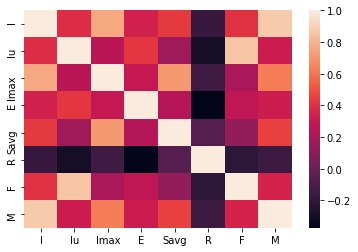

In [19]:
sns.heatmap(customer_profile.corr());

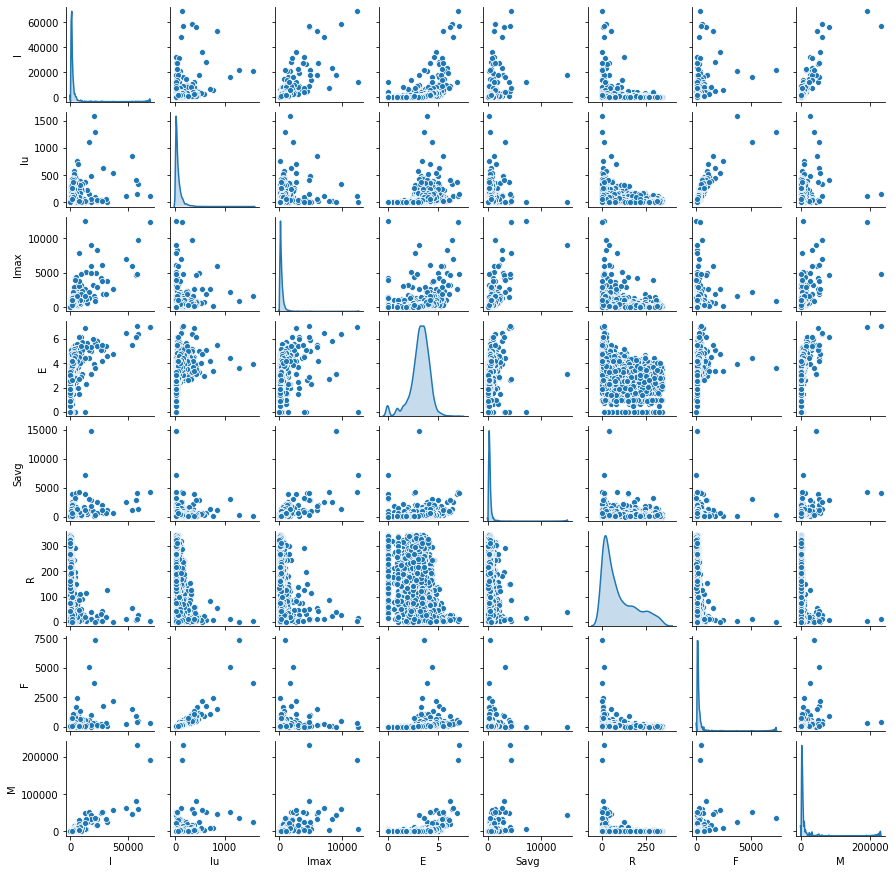

In [20]:
# produce a scatter matrix for each pair of features in the data
sns.pairplot(customer_profile, diag_kind='kde', height=1.5);

We can notice that we have a skewed distribution of the variables and there exist outliers.

This indicates how normalization is required to make the data features normally distributed as clustering algorithms require them to be normally distributed.

In [21]:
log_customer_profile = pd.DataFrame({'I': np.log(customer_profile['I']),
                                     'Iu': np.log(customer_profile['Iu']),
                                     'Imax': np.log(customer_profile ['Imax']),
                                     'E': np.log(customer_profile['E'] + 0.1), # can't take log(0) and so add a small number
                                     'Savg': np.log(customer_profile['Savg']),
                                     'R': np.log(customer_profile['R'] + 0.1), # can't take log(0) and so add a small number
                                     'F': np.log(customer_profile['F']),
                                     'M': np.log(customer_profile['M'])})
log_customer_profile

,I,Iu,Imax,E,Savg,R,F,M
CustomerID,,,,,,,,
12747.0,6.967909,3.663562,5.337538,1.492061,5.960358,3.139833,4.477337,8.157583
12748.0,9.946547,7.370860,7.396949,1.389068,5.038639,1.410987,8.219865,10.162603
12749.0,7.266827,5.068904,6.659294,1.425501,6.651456,3.139833,5.288267,8.260894
12820.0,6.582025,4.007333,5.497168,1.222851,5.462072,3.808882,4.077537,6.848366
12821.0,4.248495,1.791759,4.248495,0.702254,4.529584,4.565389,1.791759,4.529584
...,...,...,...,...,...,...,...,...
18280.0,3.806662,2.302585,3.806662,0.666002,5.196285,5.075799,2.302585,5.196285
18281.0,3.988984,1.945910,3.988984,0.663909,4.392224,1.410987,1.945910,4.392224
18282.0,4.584967,2.484907,4.248495,1.138492,4.480740,5.375741,2.484907,5.173887


In [22]:
log_customer_profile.corr()

,I,Iu,Imax,E,Savg,R,F,M
I,1.000000,0.689070,0.907660,0.514054,0.654958,-0.410874,0.751917,0.922386
Iu,0.689070,1.000000,0.569315,0.685574,0.422550,-0.345943,0.981901,0.683698
Imax,0.907660,0.569315,1.000000,0.471848,0.773054,-0.254464,0.590223,0.767253
E,0.514054,0.685574,0.471848,1.000000,0.379795,-0.235845,0.677055,0.500578
Savg,0.654958,0.422550,0.773054,0.379795,1.000000,-0.114585,0.427487,0.711582
R,-0.410874,-0.345943,-0.254464,-0.235845,-0.114585,1.000000,-0.396216,-0.429408
F,0.751917,0.981901,0.590223,0.677055,0.427487,-0.396216,1.000000,0.759416
M,0.922386,0.683698,0.767253,0.500578,0.711582,-0.429408,0.759416,1.000000


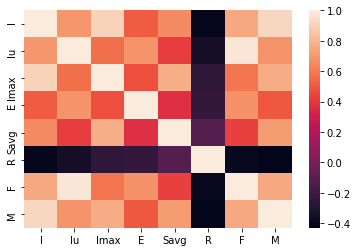

In [23]:
sns.heatmap(log_customer_profile.corr());

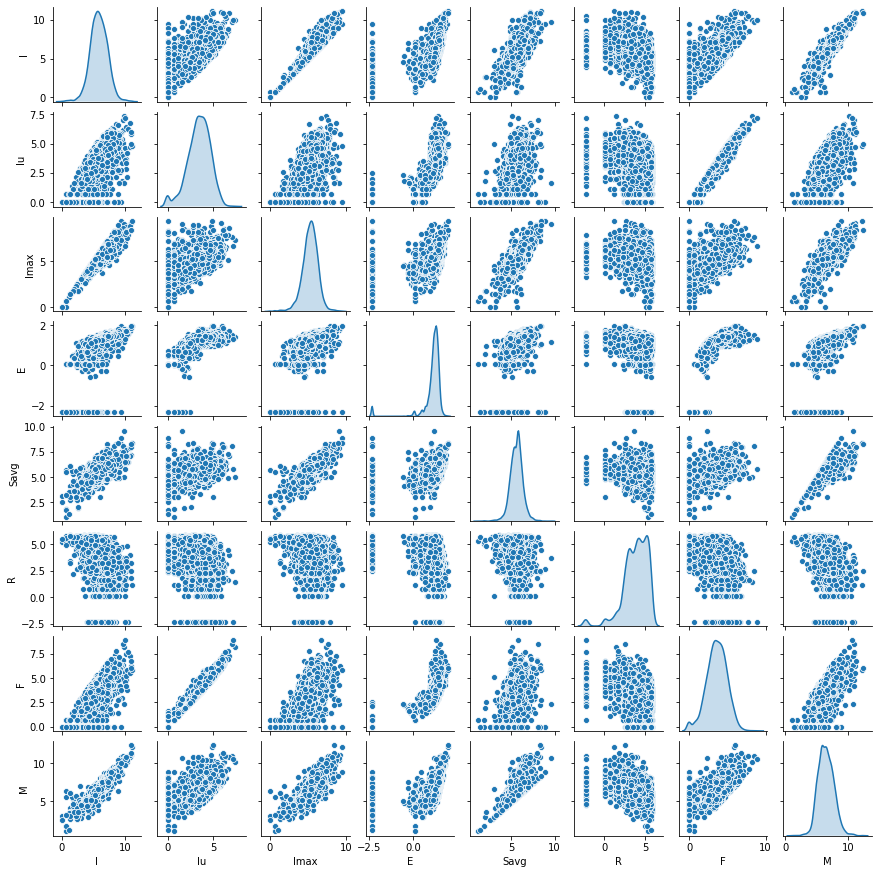

In [24]:
# produce a scatter matrix for each pair of features in the data
sns.pairplot(log_customer_profile, palette='Dark2', diag_kind='kde', height=1.5);

## Saving the Customer Profile model

In [25]:
log_customer_profile.to_csv('../dataset/customer_profile_model.csv', sep='\t')